In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scipy import stats
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('realEstate.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape


(4600, 18)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
# checking unique values of each column
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

We have 5 categorical features : ['date', 'street', 'city', 'statezip', 'country']


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
# Now performing data type convesion on columns within a pandas dataframe called df

df['price']     = df['price'].astype('int64')
df['bedrooms']  = df['bedrooms'].astype('int64')
df['floors']    = df['floors'].astype('int64')
df['street']    = df['street'].astype('string')
df['city']      = df['city'].astype('string')
df['statezip']  = df['statezip'].astype('string')
df['country']   = df['country'].astype('string')

In [13]:
df.insert(1, "year", df.date.dt.year)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   year           4600 non-null   int64         
 2   price          4600 non-null   int64         
 3   bedrooms       4600 non-null   int64         
 4   bathrooms      4600 non-null   float64       
 5   sqft_living    4600 non-null   int64         
 6   sqft_lot       4600 non-null   int64         
 7   floors         4600 non-null   int64         
 8   waterfront     4600 non-null   int64         
 9   view           4600 non-null   int64         
 10  condition      4600 non-null   int64         
 11  sqft_above     4600 non-null   int64         
 12  sqft_basement  4600 non-null   int64         
 13  yr_built       4600 non-null   int64         
 14  yr_renovated   4600 non-null   int64         
 15  street         4600 n

In [15]:
# Adding new column age of house
df['age'] = df['year'] - df['yr_built']

In [16]:
df.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
0,2014-05-02,2014,313000,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,59
1,2014-05-02,2014,2384000,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93
2,2014-05-02,2014,342000,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48
3,2014-05-02,2014,420000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51
4,2014-05-02,2014,550000,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,38


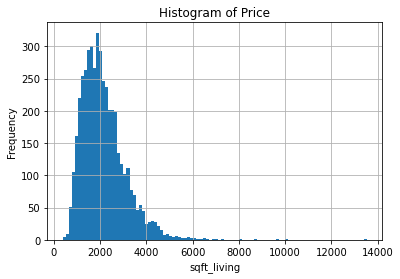

In [17]:
df['sqft_living'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('sqft_living')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()

# How Price is distributed

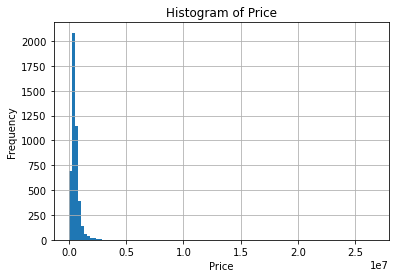

In [18]:
df['price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()

# Removing Outliers from Price

In [19]:
df = df[~(df['price'] > 0.3e7)]

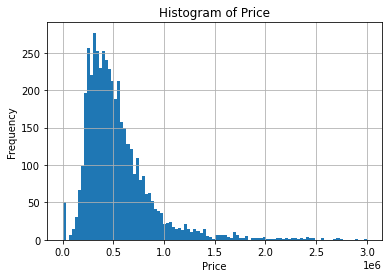

In [20]:
df['price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()

In [21]:
# Checking where price is zero

(df.price == 0).sum()

49

In [22]:
df['price'].replace(0, df["price"].median(), inplace = True)

In [23]:
(df.price == 0).sum()

0

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

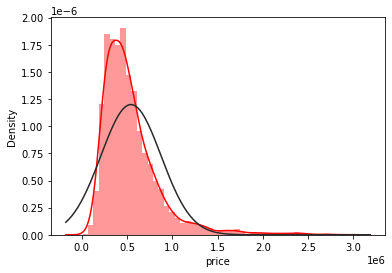

In [24]:
sns.distplot(df['price'],color="red",kde=True,fit=stats.norm)

# With the help of Q-Q plot we see whether the terget variable is Normally Distributed or not, as Linear mostly like Normally Distributed Data.

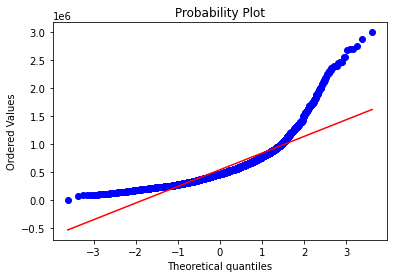

In [25]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

# As the target variable (price) is very skewed, we apply log-transformation on target varibale to make it Normally Distributed

In [26]:
df['price'] = np.log1p(df['price'])

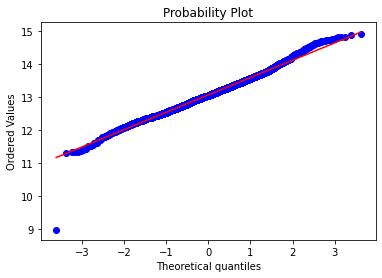

In [27]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

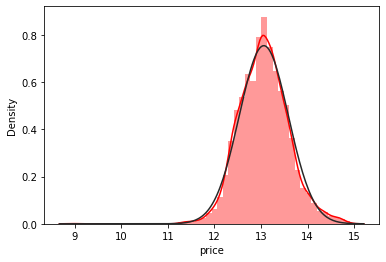

In [28]:
sns.distplot(df['price'],color="red",kde=True,fit=stats.norm)

### HeatMap for Correlation


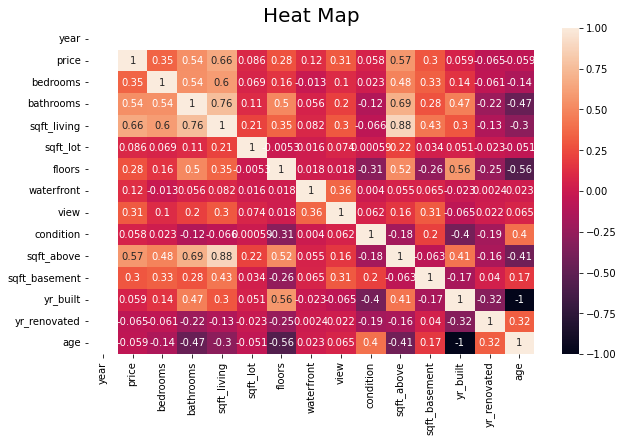

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

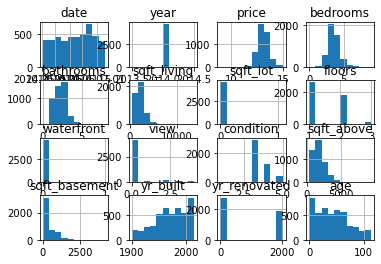

In [30]:

df.hist()

### Applying One-Hot encoding on City and then reducing Dimension using PCA

In [31]:
from sklearn.decomposition import PCA
X = pd.get_dummies(df.city, prefix='City')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['city_pca1'] = X_pca[:, 0]
df['city_pca2'] = X_pca[:, 1]

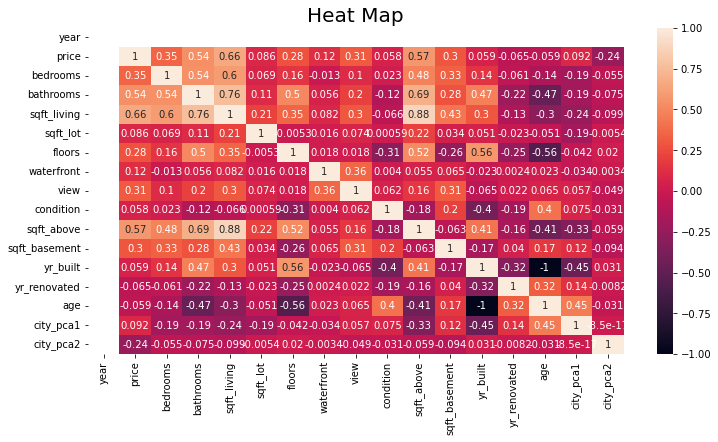

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [33]:
df.columns

Index(['date', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'age', 'city_pca1', 'city_pca2'],
      dtype='object')

### Dropping Unnecessary variables


In [34]:
df=df.drop(['date', 'street', 'statezip', 'country','year','city','age'],axis=1)

In [35]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,-0.334385,-0.018837
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,0.674952,0.002415
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,-0.356867,-0.029531
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,-0.401073,-0.613186
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,-0.378122,-0.057332


In [36]:
df.shape

(4591, 15)

In [37]:
df.to_csv('outfile_modifiedVERSION.csv', index=False)

In [38]:
#### Make Train-Test split

In [39]:
x = df.drop("price", axis=1)
y = pd.DataFrame(df["price"])

In [40]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
1403,2,1.00,910,6490,1,0,0,3,910,0,1942,1999,0.674952,0.002415
1739,3,2.50,1950,8130,2,0,0,4,1950,0,1990,0,-0.356867,-0.029531
4445,4,2.75,3270,12880,2,0,0,3,3270,0,2014,0,-0.358051,-0.030402
3683,3,2.50,1460,1613,2,0,0,3,1180,280,2007,0,0.674952,0.002415
1026,3,1.00,1320,8625,1,0,0,4,1320,0,1957,2001,-0.405594,0.784679


In [42]:

X_train['total_sqft'] = X_train['sqft_living'] + X_train['sqft_lot']
X_test['total_sqft'] = X_test['sqft_living'] + X_test['sqft_lot']

In [43]:
import xgboost as xgb

In [44]:
# Convert the training data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)


In [45]:
# Set XGBoost parameters
param = {'objective': 'reg:squarederror'}

In [46]:
# Define a custom loss function that combines Huber loss and MSE
def custom_combined_loss(preds, dtrain):
    labels = dtrain.get_label()
    residual = preds - labels
    
    # Huber loss
    huber_loss = np.where(np.abs(residual) < 1.0, 0.5 * (residual ** 2), 1.0 * (np.abs(residual) - 0.5 * 1.0))
    
    # MSE loss
    mse_loss = (residual ** 2)
    
    # Combine with weights (you can adjust these weights based on your preferences)
    combined_loss = 0.7 * huber_loss + 0.3 * mse_loss
    
    # Calculate the gradient
    grad = np.where(np.abs(residual) < 1.0, residual, 1.0 * np.sign(residual))
    
    # Hessian is set to ones, as it is not used in this example
    hess = np.ones_like(grad)
    
    return np.sum(combined_loss), np.sum(hess)

In [47]:
# Set the hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'n_estimators': [50, 100, 200]  # Add n_estimators values
}

In [48]:
# Create an XGBoost model with the custom loss function
xgb_model = xgb.XGBRegressor(**param, feval=custom_combined_loss)


In [49]:
from sklearn.metrics import make_scorer, mean_squared_error

In [50]:
# Use mean squared error as the scoring metric
custom_scorer = make_scorer(mean_squared_error, greater_is_better=False)


In [51]:
# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=custom_scorer, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None,
                                    feval=<function custom_combined_loss at 0x00000228E277AE50>,
                                    gamma=None, grow_policy=None,
                                    importance_ty...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
 

In [52]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


In [53]:
# Get the best model
best_model = grid_search.best_estimator_

In [54]:
# Predictions on training set
y_train_pred = best_model.predict(X_train)

In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
# Calculate metrics on training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)


In [58]:
# Print results
print("Training Set Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")

Training Set Metrics:
MAE: 0.14345414142193127
MSE: 0.03841080609378758
RMSE: 0.1959867497913764


In [59]:
# Predictions on test set
y_test_pred = best_model.predict(X_test)

In [60]:
# Calculate metrics on test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)



In [61]:
print("\nTest Set Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")


Test Set Metrics:
MAE: 0.20546893048828052
MSE: 0.09567212085674351
RMSE: 0.3093091024472825
